In [ ]:
import zipfile
import requests
import time
import datetime

In [ ]:
#Задание 1 - 2
#ccылка на zip папку с 17.05.2022 и на 5 лет назад
url = "https://iss.moex.com/iss/downloads/loader/7FCC80A7-A7A5-4DF8-BF40-4B8617900AB1/security.csv.zip"

payload={}
headers = {
  'Accept': 'application/json, text/plain, */*',
  'Accept-Language': 'ru-RU,ru;q=0.9,en-US;q=0.8,en;q=0.7',
  'Connection': 'keep-alive',
  'Cookie': 'dtCookie=v_4_srv_12_sn_68751C55DB9BDB699252710FACEAF867_perc_100000_ol_0_mul_1_app-3A40800d0693ad9d0f_1; rxVisitor=1652794269585SEO3A6E3I6PSS1SLKIF3OFKG1ELCN9LB; dtSa=-; __utma=241266590.1142837424.1652794270.1652794270.1652794270.1; __utmc=241266590; __utmz=241266590.1652794270.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); __utmt=1; _ym_uid=1652794270882299372; _ym_d=1652794270; _ym_isad=2; _ym_visorc=b; MicexTrackID=45920ad0.5df3527625773; __utmb=241266590.2.10.1652794270; dtLatC=1; rxvt=1652796230508|1652794269586; dtPC=12$394416318_725h-vNRPWNNTRQCIEBMWPFMPHANRWAFKAHBWH-0e0',
  'Origin': 'https://www.moex.com',
  'Referer': 'https://www.moex.com/',
  'Sec-Fetch-Dest': 'empty',
  'Sec-Fetch-Mode': 'cors',
  'Sec-Fetch-Site': 'same-site',
  'User-Agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.67 Mobile Safari/537.36',
  'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="101", "Google Chrome";v="101"',
  'sec-ch-ua-mobile': '?1',
  'sec-ch-ua-platform': '"Android"'
}

response = requests.request("GET", url, headers=headers, data=payload, allow_redirects=True)

open('moskva.zip', 'wb').write(response.content)

z = zipfile.ZipFile('moskva.zip', 'r')
time.sleep(1)
z.extractall()
time.sleep(1)
#with open('security.csv', encoding='cp1251') as f:
#  str = f.readlines()
#  count = 1
#  for i in str:
#   print(count, i.strip())
#   count += 1

In [ ]:
#открываю файл
import pandas as pd
data=pd.read_csv('/content/security.csv', sep=';', encoding = "ISO-8859-1", skiprows = 1, index_col = False)
data.columns=data.columns.str.lower()
data=data.drop(['shortname', 'name', 'boardid', 'secid', 'currencyid'], axis = 1)

In [ ]:
#делаю предобработку данных
data['day']=data.tradedate.apply(lambda x: int(x.split('.')[0]))
data['month']=data.tradedate.apply(lambda x: int(x.split('.')[1]))
data['year']=data.tradedate.apply(lambda x: int(x.split('.')[2].split(' ')[0]))
data["close"]=data.close.apply(lambda x: float(x.replace(",", ".")))
data["open"]=data.open.apply(lambda x: float(x.replace(",", ".")))
data["high"]=data.high.apply(lambda x: float(x.replace(",", ".")))
data["low"]=data.low.apply(lambda x: float(x.replace(",", ".")))
data["value"]=data.value.apply(lambda x: float(x.replace(",", ".")))
data["capitalization"]=data.capitalization.apply(lambda x: float(x.replace(",", ".")))
data["divisor"]=data.divisor.apply(lambda x: float(x.replace(",", ".")))
data['tradedate']=data.tradedate.apply(lambda x: x.replace(".", "-"))
data['date']=data.tradedate.apply(lambda x: (x.split('-')[0]))+ '-' + data.tradedate.apply(lambda x: (x.split('-')[1]))+'-'+data.tradedate.apply(lambda x: (x.split('-')[2].split(' ')[0]))
data['date'] = pd.to_datetime(data['date'], format="%d-%m-%Y").dt.date
data['month_year']=data.tradedate.apply(lambda x: (x.split('-')[1]))+'.'+data.tradedate.apply(lambda x: (x.split('-')[2].split(' ')[0]))

In [ ]:
#Задание 3: сохраняю данные в БД SQLite3
import sqlite3
conn = sqlite3.connect('moex')
c = conn.cursor()
c.execute('CREATE TABLE IF NOT EXISTS moex (close real, open real, high real, low real,  value real, duration real, yield real, decimals integer, capitalization real, divisor real, tradingsession integer, volume real, day integer, month integer, year integer)')
conn.commit()
data.to_sql('moex', conn, if_exists='replace', index=False)

In [ ]:
#проверяю, что все  сохранилось
#c.execute('''  
#SELECT * FROM moex
#          ''')
#for row in c.fetchall():
#    print (row)

In [ ]:
#необходимо для обновления версии sqlite3, чтобы можно было использовать оконные функции
!curl https://www.sqlite.org/src/tarball/sqlite.tar.gz?r=release | tar xz
%cd sqlite/
!./configure
!make sqlite3.c
%cd /content
!npx degit coleifer/pysqlite3 -f
!cp sqlite/sqlite3.[ch] .
!python setup.py build_static build
!cp build/lib.linux-x86_64-3.7/pysqlite3/_sqlite3.cpython-37m-x86_64-linux-gnu.so \
     /usr/lib/python3.7/lib-dynload/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11.1M  100 11.1M    0     0  9652k      0  0:00:01  0:00:01 --:--:-- 9644k
/content/sqlite
checking build system type... x86_64-pc-linux-gnu
checking host system type... x86_64-pc-linux-gnu
checking for gcc... gcc
checking whether the C compiler works... yes
checking for C compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking for a sed that does not truncate output... /bin/sed
checking for grep that handles long lines and -e... /bin/grep
checking for egrep... /bin/grep -E
checking for fgrep... /bin/grep -F
checking for ld used by gcc... /usr/bin/ld
checkin

In [ ]:
#задача 4.1: вывожу месяц и год, в котором 
#цена закрытия больше среднего значения цены закрытия за месяц этого года в абсолюте на 100
connection=sqlite3.connect('moex')
sql = '''with cte as (select tradedate,  day, month, month_year, year, close, \
  round((avg(close) over (partition by month, year order by year desc, month desc)) , 2) as avg_close,  \
  abs(round((close - avg(close) over (partition by month, year order by year desc, month desc)), 2)) as difference \
  from moex) \

  
  select DISTINCT month_year,  round(pow(avg(close * close) over w - avg(close) over w * avg(close) over w, 0.5), 2) as sd ,  round(avg(difference) over (partition by month, year order by year desc, month desc), 2) as avg_difference from cte \
window w as (partition by month, year order by year desc, month desc)
  order by year desc, month desc 
   '''
result_task4 = pd.read_sql_query(sql, connection)

#вывожу месяц и год, где стандартное отклонение средних показателей отклонений больше 100
task4_3_sd=result_task4.query("sd > 100")
task4_3_sd

,month_year,sd,avg_difference
1,04.2022,165.44,142.31
3,02.2022,420.50,302.58
4,01.2022,198.38,174.75
6,11.2021,131.16,118.50
18,11.2020,110.11,82.61
26,03.2020,209.67,169.46


In [ ]:
#вывожу месяц и год, где средние показатели отклонений больше 100
task4_3_avg=result_task4.query("avg_difference > 100")
task4_3_avg

,month_year,sd,avg_difference
1,04.2022,165.44,142.31
3,02.2022,420.50,302.58
4,01.2022,198.38,174.75
6,11.2021,131.16,118.50
26,03.2020,209.67,169.46


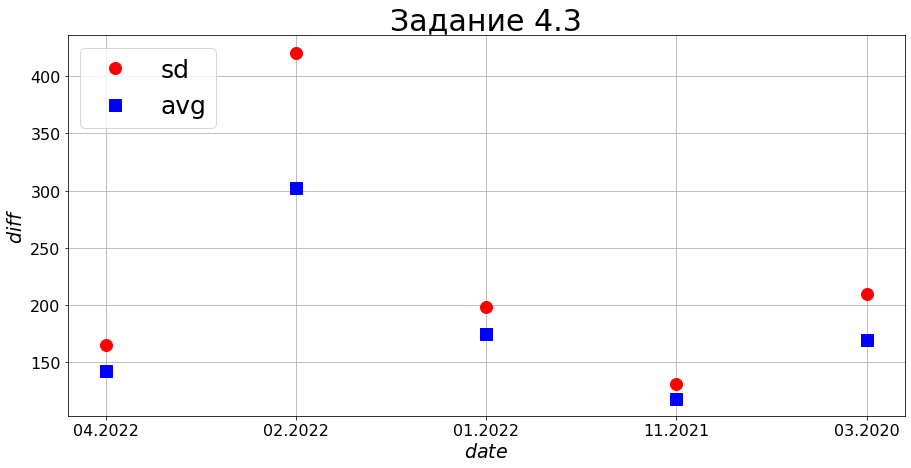

In [ ]:
#задача 4.3:строю график
import matplotlib.pyplot as plt
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (15, 7)
import numpy as np
fig, ax = plt.subplots()
plt.plot(task4_3_avg.month_year, task4_3_avg.sd, 'ro', label='sd', markersize=12)
plt.plot(task4_3_avg.month_year, task4_3_avg.avg_difference, 'bs', label='avg', markersize=12)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel('$date$', size =19)
plt.ylabel('$diff$', size =19)
plt.grid(True)
plt.legend(['sd', 'avg'], loc = 2, fontsize = 25)
ax.set_title('Задание 4.3', size =30)

plt.show()

In [ ]:
#задача 5.3 (решение для всех пунктов задания 5 - вывожу столбцы какие указаны в условии задания)
connection=sqlite3.connect('moex')
sql = '''with cte as (select tradedate,  day, month, year, month_year, date, close, \
  round((min(close) over (partition by month, year order by year asc, month asc)) , 2) as min_close,  \
  round((max(close) over (partition by month, year order by year asc, month asc)) , 2) as max_close, \
  round(((close - lag(close, 1) over (order by year asc, month asc, day asc))*100.0/abs(round((max(close) over (partition by month, year order by year asc, month asc)) , 2)-round((min(close) over (partition by month, year order by year asc, month asc)) , 2))), 2) as perc,
  lag(tradedate, 1) over (order by year asc, month asc, day asc) as prev_data,
  lag(close, 1) over (order by year asc, month asc, day asc) as prev_close,
  case 
        when round(((close - lag(close, 1) over (order by year asc, month asc, day asc))*100.0/abs(round((max(close) over (partition by month, year order by year asc, month asc)) , 2)-round((min(close) over (partition by month, year order by year asc, month asc)) , 2))), 2) > 0 then 'local_min'
        when round(((close - lag(close, 1) over (order by year asc, month asc, day asc))*100.0/abs(round((max(close) over (partition by month, year order by year asc, month asc)) , 2)-round((min(close) over (partition by month, year order by year asc, month asc)) , 2))), 2) < 0 then 'local_max'
        else 'no_extremum'
      end
    trend
  from moex ) \
  
  select prev_data as start_data, month_year,    close ,   max_close, min_close,
  trend
  from cte \
  where (perc >= 20 or perc <= -20)
  order by year asc, month asc, day asc
   '''
result_task5_1 = pd.read_sql_query(sql, connection)

result_task5_1

,start_data,month_year,close,max_close,min_close,trend
0,17-05-2017,05.2017,1967.66,1994.35,1900.38,local_max
1,30-05-2017,05.2017,1900.38,1994.35,1900.38,local_max
2,31-05-2017,06.2017,1869.66,1891.98,1817.82,local_max
3,09-06-2017,06.2017,1861.27,1891.98,1817.82,local_max
4,13-06-2017,06.2017,1838.32,1891.98,1817.82,local_max
...,...,...,...,...,...,...
293,29-04-2022,05.2022,2373.16,2424.10,2297.89,local_max
294,04-05-2022,05.2022,2404.80,2424.10,2297.89,local_min
295,11-05-2022,05.2022,2297.89,2424.10,2297.89,local_max
296,13-05-2022,05.2022,2364.60,2424.10,2297.89,local_min


In [ ]:
#задача 5.3 (решение для всех пунктов задания 5- вывожу еще дополнительные столбцы для дополнительного ознакомления)
connection=sqlite3.connect('moex')
sql = '''with cte as (select tradedate,  day, month, year, month_year, date, close, \
  round((min(close) over (partition by month, year order by year asc, month asc)) , 2) as min_close,  \
  round((max(close) over (partition by month, year order by year asc, month asc)) , 2) as max_close, \
  round(((close - lag(close, 1) over (order by year asc, month asc, day asc))*100.0/abs(round((max(close) over (partition by month, year order by year asc, month asc)) , 2)-round((min(close) over (partition by month, year order by year asc, month asc)) , 2))), 2) as perc,
  lag(tradedate, 1) over (order by year asc, month asc, day asc) as prev_data,
  lag(close, 1) over (order by year asc, month asc, day asc) as prev_close,
  case 
        when round(((close - lag(close, 1) over (order by year asc, month asc, day asc))*100.0/abs(round((max(close) over (partition by month, year order by year asc, month asc)) , 2)-round((min(close) over (partition by month, year order by year asc, month asc)) , 2))), 2) > 0 then 'local_min'
        when round(((close - lag(close, 1) over (order by year asc, month asc, day asc))*100.0/abs(round((max(close) over (partition by month, year order by year asc, month asc)) , 2)-round((min(close) over (partition by month, year order by year asc, month asc)) , 2))), 2) < 0 then 'local_max'
        else 'no_extremum'
      end
    trend
  from moex ) \
  
  select prev_data as start_data, month_year, prev_close as start_close,   close as next_close, perc,  max_close, min_close,
  trend
  from cte \
  where (perc >= 20 or perc <= -20)
  order by year asc, month asc, day asc
   '''
result_task5_1 = pd.read_sql_query(sql, connection)

result_task5_1

,start_data,month_year,start_close,next_close,perc,max_close,min_close,trend
0,17-05-2017,05.2017,1994.35,1967.66,-28.40,1994.35,1900.38,local_max
1,30-05-2017,05.2017,1932.91,1900.38,-34.62,1994.35,1900.38,local_max
2,31-05-2017,06.2017,1900.38,1869.66,-41.42,1891.98,1817.82,local_max
3,09-06-2017,06.2017,1883.34,1861.27,-29.76,1891.98,1817.82,local_max
4,13-06-2017,06.2017,1861.27,1838.32,-30.95,1891.98,1817.82,local_max
...,...,...,...,...,...,...,...,...
293,29-04-2022,05.2022,2445.17,2373.16,-57.06,2424.10,2297.89,local_max
294,04-05-2022,05.2022,2373.16,2404.80,25.07,2424.10,2297.89,local_min
295,11-05-2022,05.2022,2387.14,2297.89,-70.72,2424.10,2297.89,local_max
296,13-05-2022,05.2022,2307.50,2364.60,45.24,2424.10,2297.89,local_min
